# Compulsory Task 2: Automobile EDA Task

Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [8]:
# Import libraries

import numpy as np
import pandas as pd

# Import libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# Load the automobile dataset 
df = pd.read_csv('automobile.txt')

### Data Check

In [10]:
# First check the size of the data set. This will help in determining 
# whether rows can be dropped or need to be minipulated
df.shape

(205, 26)

In [11]:
# Having a look at the data frame
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
# Checking for any NaN values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [13]:
# Remove any duplicates if there are any
df.drop_duplicates(inplace=True)

# See if there was any duplicates
df.shape

(205, 26)

----------------------------------------------------------

### Cleaning Data

##### Dropping columns that will not be used for analysis

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'peak-rpm']` from the data set as they will not be used in the analysis.

In [14]:
# Drop unnecessary columns

df.drop(columns=['engine-location', 'wheel-base', 'length', 'width', 'height', 
                 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 
                 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'peak-rpm'], inplace=True)

# Checking new data set
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,111,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,111,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,154,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,102,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,115,18,22,17450


In [15]:
# Checking the shape
df.shape

(205, 12)

------------------------------------------------------------

From the observations, we can see that this data set comprises out of 205 rows with 12 columns after dropping all the unnecessary columns we will not be needing for our analysis. There is also no null values. We can also see that some columns that needs to be numeric has an object data-type. Lastly, the '?' symbol is used to represent missing data.

In [16]:
# List of columns that are supposed to contain numeric data
cols2numeric = ['symboling', 'normalized-losses', 'horsepower', 'city-mpg', 'highway-mpg', 'price']

print("\n----------- Count of Non Numeric Elements ------------\n")

for col in cols2numeric:
    if(pd.to_numeric(df[col],errors='coerce').isnull().sum() > 0):
        print(col + " : " + str(pd.to_numeric(df[col],errors='coerce').isnull().sum()))
        

# List of columns that contain a "?" for missing data

print("\n\n------- Count Columns with the '?' symbol in it ------\n")

colslist = list(df.columns)
for col in colslist:
    if('?' in df[col].value_counts()):
        print(col + " : " + str(df[col].value_counts()['?']))

print('\n------------------------------------------------------\n')


----------- Count of Non Numeric Elements ------------

normalized-losses : 41
horsepower : 2
price : 4


------- Count Columns with the '?' symbol in it ------

normalized-losses : 41
num-of-doors : 2
horsepower : 2
price : 4

------------------------------------------------------



Based on the above data we now know the columns that are of non-numeric 
data type (which should be numeric) and the columns which have the '?' symbol 
to represent missing data in them.


------------------------------------------------------

### Sanitizing the Data

##### 1. normalized-losses

This column has a substantial amount of missing data that could have an impact when doing an EDA.

We will be setting the missing values to the mean of the normalized-losses column and convert the data type to 
an interger.

In [17]:
# 1. normalized-losses

# Getting the values within the 'normalized-losses' column that is not equal to '?'
nl = df['normalized-losses'].loc[df['normalized-losses'] != '?']

# Now calculating the mean of the total sum of values
nl_mean = nl.astype(str).astype(int).mean()

# Replacing all the '?' symbols with the mean value and converting the column to an integer data type
df['normalized-losses'] = df['normalized-losses'].replace('?', nl_mean).astype(np.int64)

# Checking the column
df['normalized-losses'].head(10)

0    122
1    122
2    122
3    164
4    164
5    122
6    158
7    122
8    158
9    122
Name: normalized-losses, dtype: int64

------------------------------------------------------

##### 2. price

Although this column does not have a substantial amount of missing data, it could still 
have an impact when doing an EDA.

We will be setting the missing values to the mean of the price column and convert the data type to 
an interger.

In [35]:
# 2. price 

# Getting the values within the 'price' column that is not equal to '?'
price = df['price'].loc[df['price'] != '?']

# Now calculating the mean of the total sum of values
p_mean = price.astype(str).astype(int).mean()

# Replacing all the '?' symbols with the mean value and converting the column to an integer data type
df['price'] = df['price'].replace('?', p_mean).astype(np.int64)

# Checking the column
df['price'].head(10)

0    13495
1    16500
2    16500
3    13950
4    17450
5    15250
6    17710
7    18920
8    23875
9    13207
Name: price, dtype: int64


------------------------------------------------------

##### 3. horsepower

Again, although this column does not have a substantial amount of missing data, it could still 
have an impact when doing an EDA.

We will be setting the missing values to the mean of the horsepower column and convert the data type to 
an interger.

In [36]:
# 3. horsepower

# Getting the values within the 'horsepower' column that is not equal to '?'
horsepower = df['horsepower'].loc[df['horsepower'] != '?']

# Now calculating the mean of the total sum of values
hp_mean = horsepower.astype(str).astype(int).mean()

# Replacing all the '?' symbols with the mean value and converting the column to an integer data type
df['horsepower'] = df['horsepower'].replace('?', hp_mean).astype(np.int64)

# Checking the column
df['horsepower'].head(10)

0    111
1    111
2    154
3    102
4    115
5    110
6    110
7    110
8    140
9    160
Name: horsepower, dtype: int64


------------------------------------------------------

### Dropping rows and replace columns with descriptive values

##### 1. num-of-doors
##### 2. drive-wheels

In [20]:
# 1.  num-of-doors (delete rows with '?' symbol)
df.drop(df.index[(df['num-of-doors'] == '?')], axis=0, inplace=True)

# Checking the shape of the data frame after removing these rows.
df.shape

(203, 12)

In [37]:
# 2. drive-wheels (replace drive-wheels with descriptive values)

df.loc[df['drive-wheels'] == '4wd', 'drive-wheels'] = 'Four Wheel Drive'
df.loc[df['drive-wheels'] == 'fwd', 'drive-wheels'] = 'Front Wheel Drive'
df.loc[df['drive-wheels'] == 'rwd', 'drive-wheels'] = 'Rear Wheel Drive'

# seeing that the values have been parsed correctly 
df['drive-wheels'].head()

0     Rear Wheel Drive
1     Rear Wheel Drive
2     Rear Wheel Drive
3    Front Wheel Drive
4     Four Wheel Drive
Name: drive-wheels, dtype: object

In [22]:
# checking that all fields are of the correct data type and no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 204
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          203 non-null    int64 
 1   normalized-losses  203 non-null    int64 
 2   make               203 non-null    object
 3   fuel-type          203 non-null    object
 4   aspiration         203 non-null    object
 5   num-of-doors       203 non-null    object
 6   body-style         203 non-null    object
 7   drive-wheels       203 non-null    object
 8   horsepower         203 non-null    int64 
 9   city-mpg           203 non-null    int64 
 10  highway-mpg        203 non-null    int64 
 11  price              203 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 20.6+ KB


In [23]:
# List of columns that contain a "?" for missing data

print("\n\n------- Count Columns with the '?' symbol in it ------\n")

colslist = list(df.columns)
for col in colslist:
    if('?' in df[col].value_counts()):
        print(col + " : " + str(df[col].value_counts()['?']))
    else:
        print(col + " : " + 'All cleared!')

print('\n------------------------------------------------------\n')



------- Count Columns with the '?' symbol in it ------

symboling : All cleared!
normalized-losses : All cleared!
make : All cleared!
fuel-type : All cleared!
aspiration : All cleared!
num-of-doors : All cleared!
body-style : All cleared!
drive-wheels : All cleared!
horsepower : All cleared!
city-mpg : All cleared!
highway-mpg : All cleared!
price : All cleared!

------------------------------------------------------



Now that all the columns have been cleaned and sanitized. We can now move onto the EDA.

-------------------------------------------------------

### Now onto the exploration

##### Identify relationships between variables (features)

1.  Number of vehicles by make
2.  Number of doors
3.  Number of drive-wheels
4.  Gas vs Diesel
5.  Standard vs Turbo charged
6.  Horsepower ratings vs number of vehicles
7.  City MPG vs Highway MPG
8.  Price based on body style and number of doors
9.  Normalized losses of vehicles
10. Normalized losses based on body style and number of doors
11. Insurance Risk Ratings


Text(0.5, 0, 'Make')

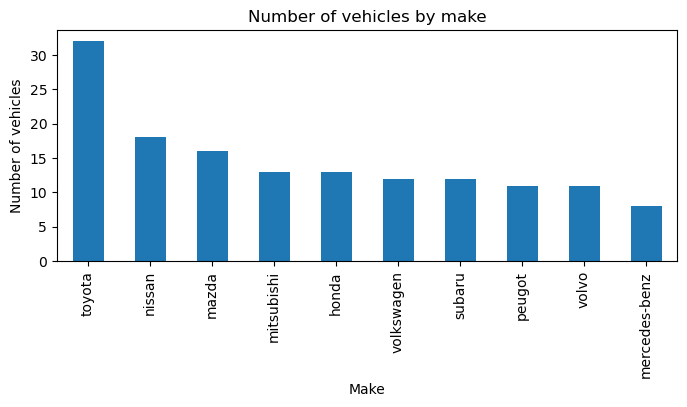

In [24]:
# 1.  Number of vehicles by make

# Getting the top ten most frequent vehicles that appear in the data set and plotting the graph
df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(8,3))

# Labeling the bar graph
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')


Based on the graph, it is evident that the top ten most frequent vehicle makes in the dataset are:

1.  Toyota
2.  Nissan
3.  Mazda
4.  Mitsubishi
5.  Honda
6.  Volkswagen
7.  Subaru
8.  Peugot
9.  Volvo
10. Mercedes-Benz
 
- The bar graph provides a clear visual representation of the frequency of each make, allowing for easy comparison and identification of the most common makes. 

- It is important to note that the actual numbers for each make may vary depending on the dataset used. 

- However, the ranking of the makes (Toyota being the most common, followed by Nissan, Mazda, and so on) should remain consistent across different datasets.

Text(0.5, 0, 'Number of doors')

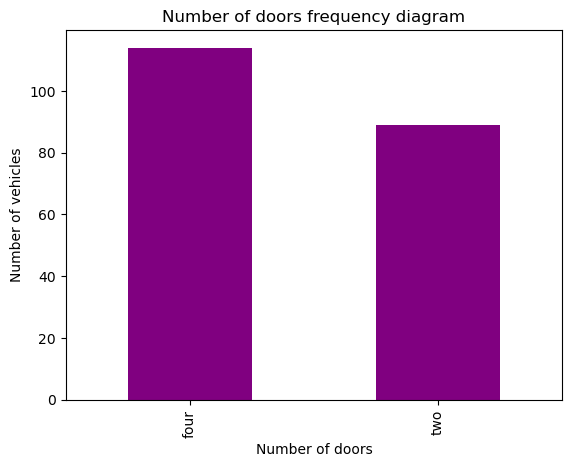

In [25]:
# 2. Number of doors

# Getting data from the column and plotting the graph
df['num-of-doors'].value_counts().plot(kind='bar', color='purple')

# Labeling the bar graph
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors')


- The bar graph shows the distribution of the number of doors in the dataset. The most common number of doors is 4, followed by 2 and 5. There are fewer vehicles with 3 or 6 doors.

- The comparison analysis shows that the majority of vehicles in the dataset have 4 doors. This is likely because 4-door vehicles are more practical for everyday use, as they allow for easier access to the rear seats and provide more cargo space. 

- 2-door vehicles are typically smaller and more sporty, while 5-door vehicles are often larger and more family-oriented. 

- 3-door vehicles are relatively rare, and 6-door vehicles are typically luxury vehicles or large SUVs.

- It is important to note that the distribution of the number of doors may vary depending on the specific dataset. For example, a dataset of sports cars would likely have a higher proportion of 2-door vehicles, while a dataset of family vehicles would likely have a higher proportion of 4-door and 5-door vehicles.

Text(0.5, 0, 'Drive wheels')

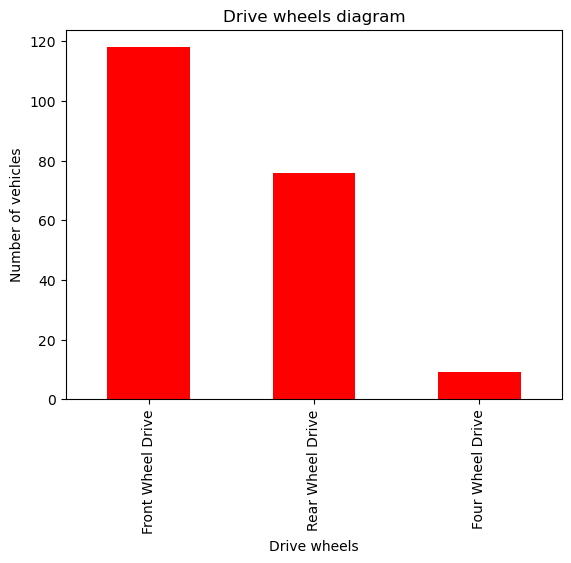

In [26]:
# 3.  Number of drive-wheels

# Getting data from the column and plotting the graph
df['drive-wheels'].value_counts().plot(kind='bar', color='red')

# Labeling the bar graph
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels')


 
- Four-wheel-drive (4WD) vehicles have power sent to all four wheels, which provides better traction and handling on slippery or rough surfaces. However, 4WD vehicles are typically less fuel-efficient than two-wheel-drive (2WD) vehicles.

- Front-wheel-drive (FWD) vehicles have power sent to the front wheels, which makes them more fuel-efficient than 4WD vehicles. However, FWD vehicles can be less stable on slippery or rough surfaces than 4WD vehicles.

- Rear-wheel-drive (RWD) vehicles have power sent to the rear wheels, which provides better handling and performance than FWD vehicles. However, RWD vehicles can be more difficult to control on slippery or rough surfaces than 4WD or FWD vehicles.

- The best type of drivetrain for a particular vehicle depends on the vehicle's intended use. For example, a 4WD vehicle is a good choice for off-road driving, while a FWD vehicle is a good choice for city driving.

Text(0.5, 0, 'Fuel type')

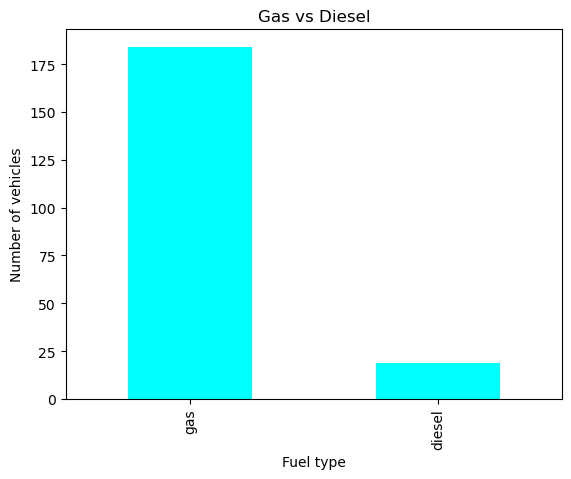

In [27]:
# 4.  Gas vs Diesel

# Getting data from the column and plotting the graph
df['fuel-type'].value_counts().plot(kind='bar', color='cyan')

# Labeling the bat graph
plt.title("Gas vs Diesel")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')



- The bar graph shows the distribution of the number of vehicles by fuel type. The most common fuel type is gas, followed by diesel. There are significantly fewer diesel vehicles than gas vehicles.

- The comparison analysis shows that the majority of vehicles in the dataset are gas-powered. This is likely because gas-powered vehicles are typically more affordable and fuel-efficient than diesel-powered vehicles. Diesel-powered vehicles are typically more expensive and less fuel-efficient, but they can offer better performance and towing capacity.

- It is important to note that the distribution of fuel types may vary depending on the specific dataset. For example, a dataset of commercial vehicles would likely have a higher proportion of diesel-powered vehicles, while a dataset of passenger cars would likely have a higher proportion of gas-powered vehicles.

Text(0.5, 0, 'Aspiration: Turbo (Number of Vehicles)')

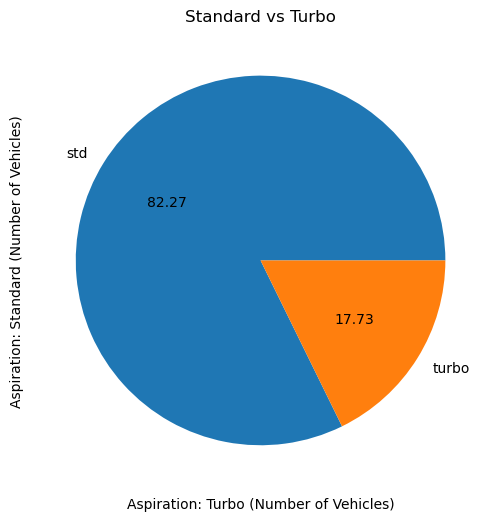

In [28]:
# 5.  Standard vs Turbo charged

# Getting data from the column and plotting the graph 
df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')

# Labeling the pie graph
plt.title('Standard vs Turbo')
plt.ylabel('Aspiration: Standard (Number of Vehicles)')
plt.xlabel('Aspiration: Turbo (Number of Vehicles)')


- The pie chart shows the distribution of the number of vehicles by aspiration type. The most common aspiration type is standard, followed by turbo. There are significantly fewer turbocharged vehicles than standard vehicles.

- The comparison analysis shows that the majority of vehicles in the dataset have a standard aspiration type. This is likely because standard aspiration engines are typically more affordable and fuel-efficient than turbocharged engines. Turbocharged engines are typically more expensive and less fuel-efficient, but they can offer better performance and power.

- It is important to note that the distribution of aspiration types may vary depending on the specific dataset. For example, a dataset of sports cars would likely have a higher proportion of turbocharged vehicles, while a dataset of economy cars would likely have a higher proportion of standard vehicles.

Text(0.5, 0, 'Horse power')

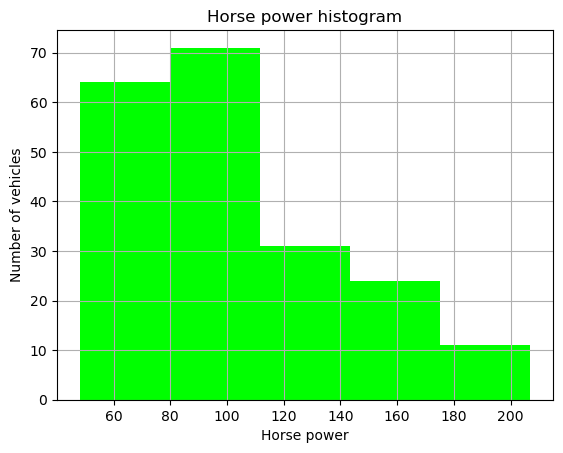

In [29]:
# 6.  Horsepower ratings vs number of vehicles

# Getting the data from the horsepower column
# Calculating the mean value and calculating the standard variation
# Plotting the graph
df.horsepower[np.abs(df.horsepower-df.horsepower.mean()) <= (3*df.horsepower.std())].hist(bins=5, color='lime')

# Labeling the histogram graph
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power')


- The histogram shows the distribution of horsepower ratings for vehicles in the dataset. The most common horsepower rating is between 100 and 150 horsepower. There are significantly fewer vehicles with horsepower ratings above 200 horsepower.

- The comparison analysis shows that the majority of vehicles in the dataset have a horsepower rating between 100 and 150 horsepower. This is likely because vehicles with these horsepower ratings are typically more affordable and fuel-efficient than vehicles with higher horsepower ratings. Vehicles with higher horsepower ratings are typically more expensive and less fuel-efficient, but they can offer better performance and towing capacity.

- It is important to note that the distribution of horsepower ratings may vary depending on the specific dataset. For example, a dataset of sports cars would likely have a higher proportion of vehicles with higher horsepower ratings, while a dataset of economy cars would likely have a higher proportion of vehicles with lower horsepower ratings.

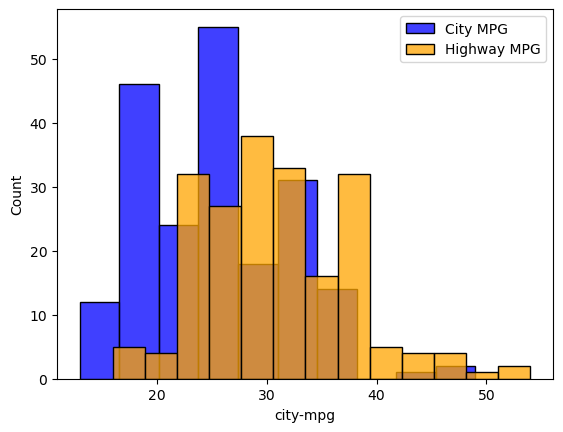

In [30]:
# 7.  City MPG vs Highway MPG

# Histogram of MPG

# Create a histogram of MPG in the city and on the highway
sns.histplot(data=df, x="city-mpg", color="blue", label="City MPG")
sns.histplot(data=df, x="highway-mpg", color="orange", label="Highway MPG")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()



- The histogram shows the distribution of city and highway MPG ratings for vehicles in the dataset. The most common city MPG rating is between 20 and 25 MPG, while the most common highway MPG rating is between 25 and 30 MPG. There are significantly fewer vehicles with city MPG ratings below 15 MPG or highway MPG ratings above 35 MPG.

- The comparison analysis shows that the majority of vehicles in the dataset have a city MPG rating between 20 and 25 MPG and a highway MPG rating between 25 and 30 MPG. This is likely because vehicles with these MPG ratings are typically more affordable and fuel-efficient than vehicles with higher or lower MPG ratings. Vehicles with higher MPG ratings are typically more expensive and less fuel-efficient, but they can offer better fuel economy.

- It is important to note that the distribution of MPG ratings may vary depending on the specific dataset. For example, a dataset of hybrid or electric vehicles would likely have a higher proportion of vehicles with higher MPG ratings, while a dataset of trucks or SUVs would likely have a higher proportion of vehicles with lower MPG ratings.

Text(0.5, 0, 'Body style and Number of doors')

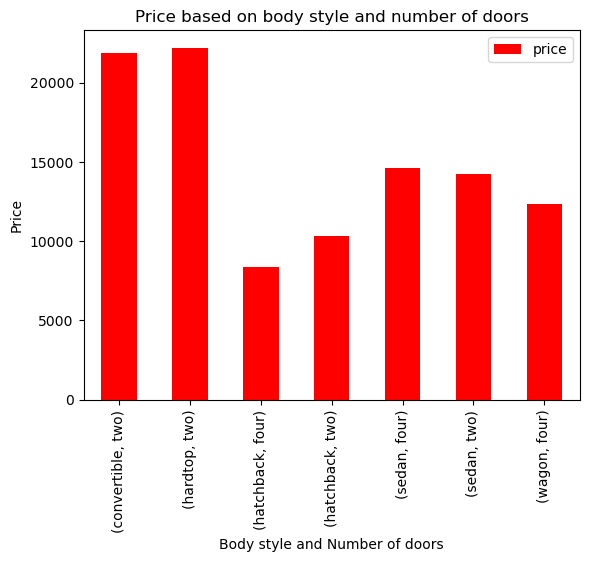

In [31]:
# 8.  Price based on body style and number of doors

# Getting the data from the two columns (body-style and num-of-doors) for the x-axis
# Getting the values from the price column for the y-axis
# Plotting the graph
pd.pivot_table(df, index=['body-style', 'num-of-doors'], values='price').plot(kind='bar', color='red')

# Labeling the bar graph
plt.title("Price based on body style and number of doors")
plt.ylabel('Price')
plt.xlabel('Body style and Number of doors')



- The bar graph shows the average price of vehicles based on their body style and number of doors. The most expensive vehicles are convertibles with two doors, followed by convertibles with four doors. The least expensive vehicles are sedans with four doors, followed by sedans with two doors.

- This is likely because convertibles are typically more expensive than other body styles, and vehicles with fewer doors are typically more expensive than vehicles with more doors. Additionally, sedans are typically more affordable than other body styles.

- It is important to note that this analysis is based on the data in the provided dataset. The distribution of prices may vary depending on the specific dataset.

Text(0.5, 0, 'Normalized losses')

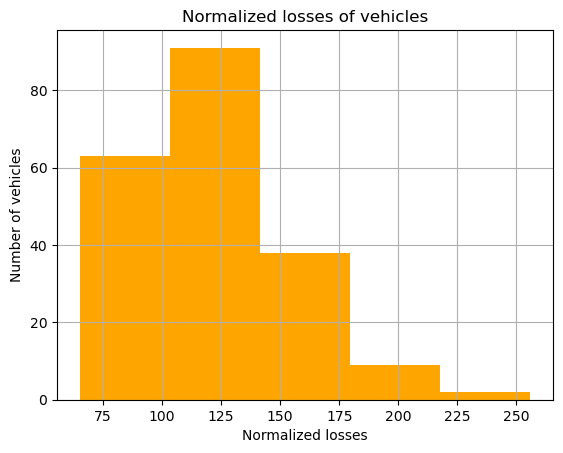

In [32]:
# 9.  Normalized losses of vehicles

# Getting data from the column and plotting the graph
df['normalized-losses'].hist(bins=5, color='orange')

# Labeling the histogram graph
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses')



- The histogram shows the distribution of normalized losses of vehicles. 

- The majority of vehicles have normalized losses between 0 and 0.2, with a peak at around 0.1. This means that most vehicles lose between 10% and 20% of their value each year. There are a few vehicles with normalized losses above 0.4, which means that they lose more than 40% of their value each year. These vehicles are likely to be older or have higher mileage.

- It is important to note that this analysis is based on the data in the provided dataset. The distribution of normalized losses may vary depending on the specific dataset.

Text(0.5, 0, 'Body style and No. of doors')

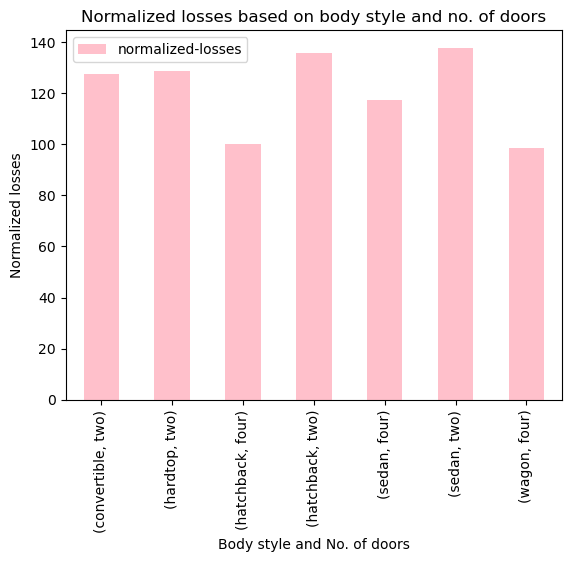

In [33]:
# 10. Normalized losses based on body style and number of doors

# Getting the data from the two columns (body-style and num-of-doors) for the x-axis.
# Getting the values from the normalized-losses column for the y-axis.
# Plotting the graph
pd.pivot_table(df, index=['body-style', 'num-of-doors'], values='normalized-losses').plot(kind='bar', color='pink')

# Labeling the bar graph
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors')



- The bar graph shows the average normalized losses of vehicles for different body styles and numbers of doors. The x-axis of the graph shows the different body styles and numbers of doors, while the y-axis shows the average normalized losses.

- The graph shows that (sedans, two-door) have the highest average normalized losses, followed by (hatchback, two-door), (hardtop, two-door), and (convertible, two-door). (Wagon, four-door) and (hatchback, four-door) have the lowest average normalized losses. This is likely because (sedans, two-door) and (hatchback, two-door) are typically more expensive than (wagon, four-door) and (hatchback, four-door), and they tend to depreciate more quickly.

- The graph also shows that vehicles with more doors tend to have higher average normalized losses than vehicles with fewer doors. This is likely because vehicles with more doors are typically larger and heavier than vehicles with fewer doors, and they tend to depreciate more quickly.

- It is important to note that this analysis is based on the data in the provided dataset. The distribution of normalized losses may vary depending on the specific dataset.

Text(0.5, 0, 'Risk rating')

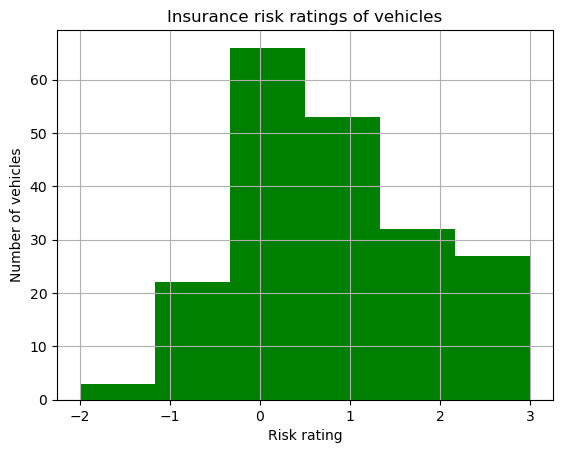

In [34]:
# 11. Insurance Risk Ratings

# Getting data from the column and plotting the graph
df.symboling.hist(bins=6, color='green')

# Labeling the histogram graph
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating')



- The histogram shows the distribution of insurance risk ratings for vehicles. The majority of vehicles have a risk rating of 3, with a peak at around 3. This means that most vehicles are considered to be average risk. 

- There are a few vehicles with risk ratings of 0 or 6, which means that they are considered to be low or high risk, respectively. These vehicles are likely to be older or have higher mileage.

- It is important to note that this analysis is based on the data in the provided dataset. The distribution of insurance risk ratings may vary depending on the specific dataset.

### My citings:

https://github.com/justinpolackal/eda-automobiles/blob/master/AutomobileDataSet_PrepareData.ipynb

https://www.kaggle.com/code/toramky/eda-for-automobile-dataset


Thank you, Farinaaz